In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

C:\Users\chris\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [8]:
    training_set = tf.keras.utils.image_dataset_from_directory(
        "Vegetable Images\\train",
    labels= 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size= 32,
    image_size=(64,64),
    shuffle = True,
    seed = None,
    validation_split= None,
    subset=None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio=False
)
training_set = training_set.map(lambda x, y: (data_augmentation(x, training=True), y))

Found 15000 files belonging to 15 classes.


In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "Vegetable Images\\validation",
    labels= 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size= 32,
    image_size=(64,64),
    shuffle = True,
    seed = None,
    validation_split= None,
    subset=None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio=False 
)

Found 3000 files belonging to 15 classes.


In [10]:
cnn = tf.keras.models.Sequential()

rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
cnn.add(rescale)
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting


cnn.add(tf.keras.layers.Dense(units=15,activation='softmax'))

In [12]:
cnn.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
469/469 [==============================] - 340s 720ms/step - loss: 1.4305 - accuracy: 0.5159 - val_loss: 1.1192 - val_accuracy: 0.6070
Epoch 2/10
469/469 [==============================] - 315s 671ms/step - loss: 0.9498 - accuracy: 0.6872 - val_loss: 0.6734 - val_accuracy: 0.7737
Epoch 3/10
469/469 [==============================] - 310s 660ms/step - loss: 0.6705 - accuracy: 0.7850 - val_loss: 0.4238 - val_accuracy: 0.8603
Epoch 4/10
469/469 [==============================] - 308s 657ms/step - loss: 0.5254 - accuracy: 0.8367 - val_loss: 0.4478 - val_accuracy: 0.8673
Epoch 5/10
469/469 [==============================] - 327s 697ms/step - loss: 0.4272 - accuracy: 0.8721 - val_loss: 0.3373 - val_accuracy: 0.9027
Epoch 6/10
469/469 [==============================] - 353s 752ms/step - loss: 0.3747 - accuracy: 0.8926 - val_loss: 0.3652 - val_accuracy: 0.8927
Epoch 7/10
469/469 [==============================] - 318s 678ms/step - loss: 0.3156 - accuracy: 0.9087 - val_loss: 0.4375 -

In [13]:
cnn.save('trained_model_.h5')

C:\Users\chris\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
print(training_history.history['val_accuracy'][-1] * 100)

94.93333101272583


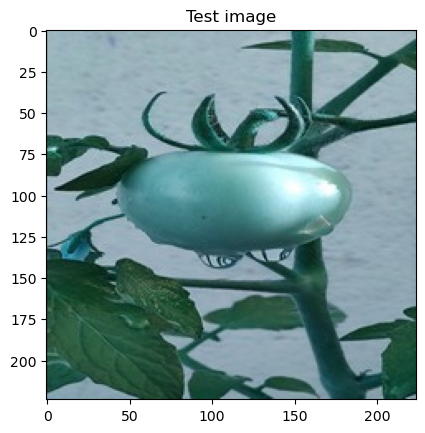

In [15]:
import cv2
image_path = "Vegetable Images/test/Tomato/1009.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test image")
plt.show()

In [16]:
image = tf.keras.preprocessing.image.load_img(image_path, 
                                              target_size=(64,64))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_np_array = np.array([input_array])
prediction = cnn.predict(input_np_array)

1/1 [==============================] - 1s 1s/step


In [17]:
prediction

array([[3.1934466e-18, 8.3027840e-18, 1.8200425e-26, 5.6035075e-22,
        9.9973298e-16, 2.7395626e-13, 8.8524777e-17, 9.3999392e-12,
        4.9704500e-14, 3.0701293e-22, 5.6822694e-22, 1.6819111e-17,
        1.9279550e-15, 1.9722583e-13, 1.0000000e+00]], dtype=float32)

In [18]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "Vegetable Images/test",
    labels= 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size= 32,
    image_size=(64,64),
    shuffle = True,
    seed = None,
    validation_split= None,
    subset=None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio=False 
)

Found 3000 files belonging to 15 classes.


In [19]:
result_index = np.where(prediction[0] == max(prediction[0]))
result_index[0][0]

14

In [20]:
test_set.class_names[result_index[0][0]]

'Tomato'

In [21]:
print(f"The image is {test_set.class_names[result_index[0][0]]}")

The image is Tomato


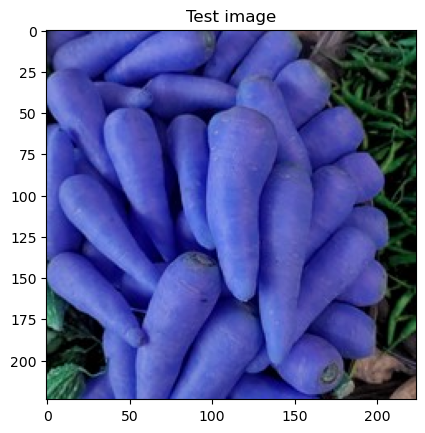

In [22]:
image_path2 = "Vegetable Images/test/Carrot/1009.jpg"
img = cv2.imread(image_path2)
plt.imshow(img)
plt.title("Test image")
plt.show()

In [23]:
image2 = tf.keras.preprocessing.image.load_img(image_path2, 
                                               target_size=(64,64))
input_array2 = tf.keras.preprocessing.image.img_to_array(image2)
input_np_array2 = np.array([input_array2])
prediction2 = cnn.predict(input_np_array2)

1/1 [==============================] - 0s 58ms/step


In [24]:
result_index2 = np.where(prediction2[0] == max(prediction2[0]))

In [25]:
print(f"The image is {test_set.class_names[result_index2[0][0]]}")

The image is Carrot


In [26]:
import pandas as pd
def test_images_batch(test_set):
    '''Iterate through image set and predict the results. returns
    data frame with imagepath, predicted class and actual class'''
    result_df = pd.DataFrame(columns=["Image Path", "Predicted Class", "Actual Class"])

    def process_image(image_path, image, test_set):
        global cnn
        image_array = tf.keras.preprocessing.image.img_to_array(image)
        input_array = np.array([image_array])
        prediction = cnn.predict(input_array)
        result_index = np.where(prediction[0] == max(prediction[0]))
        predicted_class = test_set.class_names[result_index[0][0]]
        actual_class = image_path.split('/')[-2]
        result_df.loc[len(result_df)] = [image_path, predicted_class, actual_class]

    for image_path in test_set.file_paths:
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
        process_image(image_path, image, test_set)

    return result_df

In [27]:
result_df = test_images_batch(test_set)

1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 42ms/step


In [28]:
result_df

,Image Path,Predicted Class,Actual Class
0,Vegetable Images/test\Tomato\1092.jpg,Tomato,Vegetable Images
1,Vegetable Images/test\Broccoli\1126.jpg,Broccoli,Vegetable Images
2,Vegetable Images/test\Tomato\1132.jpg,Tomato,Vegetable Images
3,Vegetable Images/test\Pumpkin\1168.jpg,Pumpkin,Vegetable Images
4,Vegetable Images/test\Cabbage\0959.jpg,Cabbage,Vegetable Images
...,...,...,...
2995,Vegetable Images/test\Capsicum\1170.jpg,Capsicum,Vegetable Images
2996,Vegetable Images/test\Pumpkin\1058.jpg,Pumpkin,Vegetable Images
2997,Vegetable Images/test\Cabbage\1105.jpg,Cabbage,Vegetable Images
2998,Vegetable Images/test\Pumpkin\1041.jpg,Pumpkin,Vegetable Images
